#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [3]:
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

In [4]:
df_normalizado = pd.concat([df.customerID,df.Churn,customer,phone,internet,account],axis=1)
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [6]:
for x in df_normalizado.columns:
    if df_normalizado[x].dtype == 'object':
        print(f"\n Coluna: {x}")
        print(df_normalizado[x].value_counts())



 Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

 Coluna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

 Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

 Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

 Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

 Coluna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

 Coluna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

 Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

 Coluna: OnlineSecurity
OnlineSecurity
No                     3608
Yes      

A coluna Churn apresentou um problema.

In [7]:
df_normalizado.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [8]:
df_normalizado.Churn.isnull().sum()

np.int64(0)

In [9]:
df_normalizado.Churn = df_normalizado.Churn.replace(r'^\s*$', np.nan, regex=True)
df_normalizado.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [10]:
df_normalizado.Churn = df_normalizado.Churn.fillna('No')
df_normalizado.Churn.value_counts()

,count
Churn,
No,5398
Yes,1869


In [11]:
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'].str.replace(',', '.'), errors='coerce')


In [12]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
colunas = list(df_normalizado.columns)
for x in colunas:
    print(f"\nColuna: {x}")
    print(df_normalizado[x].value_counts(dropna=False))


Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Coluna: Churn
Churn
No     5398
Yes    1869
Name: count, dtype: int64

Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna: tenure
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     

In [14]:
df_normalizado.Churn.value_counts()
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [15]:
colunas_y_n = ['Churn','Dependents','Partner','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
              'StreamingMovies','PaperlessBilling']


In [16]:
df_normalizado[colunas_y_n] = df_normalizado[colunas_y_n].apply(lambda x: x.replace('Yes', '1').replace('No', '0'))

df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [17]:
df_normalizado['Charges.Monthly'] = pd.to_numeric(df_normalizado['Charges.Monthly'], errors='coerce')
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

In [18]:
df_normalizado['Contas_Diarias'] = df_normalizado['Charges.Monthly'] / 30
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [19]:
df_normalizado.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Rotatividade',
    'gender': 'Sexo_Cliente',
    'SeniorCitizen': 'Cliente_Idoso',
    'Partner': 'Cliente_Parceiro',
    'Dependents': 'Cliente_Dependentes',
    'tenure': 'Tempo_Servico',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato_Conta',
    'PaperlessBilling': 'Conta_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Contas_Mensais',
    'Charges.Total': 'Contas_Totais'
}, inplace=True)

In [20]:
df_normalizado['Sexo_Cliente'] = df_normalizado['Sexo_Cliente'].apply(lambda x: x.replace('Female', 'feminino').replace('Male', 'masculino'))

In [21]:
df_normalizado.head()

,ID_Cliente,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Contas_Mensais,Contas_Totais,Contas_Diarias
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [22]:
df_normalizado.Rotatividade = df_normalizado.Rotatividade.astype(int)

#📊 Carga e análise

In [23]:
df_normalizado.describe()

,Rotatividade,Cliente_Idoso,Tempo_Servico,Contas_Mensais,Contas_Totais,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.437115,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


In [24]:
col_num = ['Rotatividade','Cliente_Idoso','Tempo_Servico','Contas_Diarias','Contas_Mensais','Contas_Totais']
median_line = df_normalizado[col_num].agg(['median'])
median_line

,Rotatividade,Cliente_Idoso,Tempo_Servico,Contas_Diarias,Contas_Mensais,Contas_Totais
median,0.0,0.0,29.0,2.343333,70.3,1391.0


In [25]:
stats = df_normalizado[col_num].describe()
stats

,Rotatividade,Cliente_Idoso,Tempo_Servico,Contas_Diarias,Contas_Mensais,Contas_Totais
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.257190,0.162653,32.346498,2.157337,64.720098,2280.634213
std,0.437115,0.369074,24.571773,1.004319,30.129572,2268.632997
min,0.000000,0.000000,0.000000,0.608333,18.250000,18.800000
25%,0.000000,0.000000,9.000000,1.180833,35.425000,400.225000
50%,0.000000,0.000000,29.000000,2.343333,70.300000,1391.000000
75%,1.000000,0.000000,55.000000,2.995833,89.875000,3785.300000
max,1.000000,1.000000,72.000000,3.958333,118.750000,8684.800000


In [26]:
stats = pd.concat([stats,median_line], axis=0)
stats

,Rotatividade,Cliente_Idoso,Tempo_Servico,Contas_Diarias,Contas_Mensais,Contas_Totais
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.257190,0.162653,32.346498,2.157337,64.720098,2280.634213
std,0.437115,0.369074,24.571773,1.004319,30.129572,2268.632997
min,0.000000,0.000000,0.000000,0.608333,18.250000,18.800000
25%,0.000000,0.000000,9.000000,1.180833,35.425000,400.225000
50%,0.000000,0.000000,29.000000,2.343333,70.300000,1391.000000
75%,1.000000,0.000000,55.000000,2.995833,89.875000,3785.300000
max,1.000000,1.000000,72.000000,3.958333,118.750000,8684.800000
median,0.000000,0.000000,29.000000,2.343333,70.300000,1391.000000


In [27]:
df_normalizado.Rotatividade.value_counts()
df_normalizado['ChurnLógico'] = df_normalizado['Rotatividade'].astype(str)
df_normalizado['ChurnLógico'] = df_normalizado['ChurnLógico'].apply(lambda x: x.replace('1', 'Sim').replace('0', 'Não'))
df_normalizado.head()

,ID_Cliente,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Contas_Mensais,Contas_Totais,Contas_Diarias,ChurnLógico
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,Não
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,Não
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,Sim
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,Sim
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,Sim


In [28]:
df_churn = df_normalizado.groupby('Rotatividade')[['ID_Cliente']].count()
clientes_total = df_normalizado.ID_Cliente.count()
df_churn['porcentagem'] = (df_churn['ID_Cliente'] / clientes_total)*100
df_churn

,ID_Cliente,porcentagem
Rotatividade,,
0,5398,74.280996
1,1869,25.719004


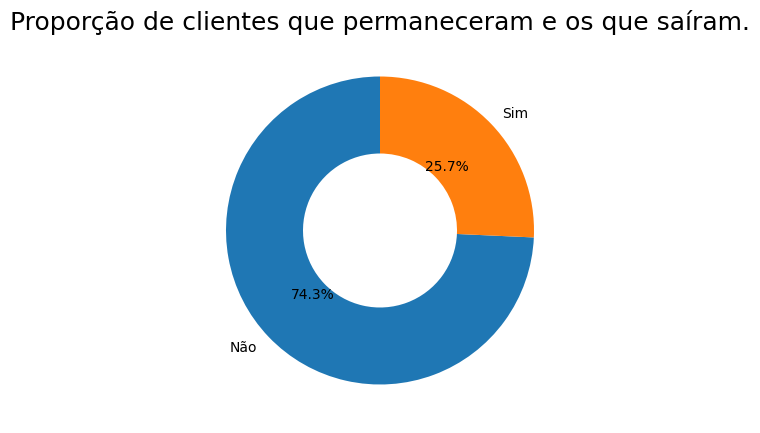

In [29]:
lista_nome=['Não','Sim']
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Proporção de clientes que permaneceram e os que saíram.', fontsize=18)
ax.pie(df_churn['ID_Cliente'],
       labels=lista_nome,
       autopct='%1.1f%%',
       startangle=90,
       wedgeprops={'width': 0.5})
plt.show()

In [30]:
df_churn_sexo = df_normalizado.groupby(['Rotatividade','Sexo_Cliente'])[['ID_Cliente']].count()
df_churn_sexo

ID_Cliente
Rotatividade Sexo_Cliente            
0            feminino            2653
             masculino           2745
1            feminino             939
             masculino            930

In [31]:
df_churn_sexo = df_churn_sexo.reset_index()
df_churn_sexo

,Rotatividade,Sexo_Cliente,ID_Cliente
0,0,feminino,2653
1,0,masculino,2745
2,1,feminino,939
3,1,masculino,930


In [32]:
soma_fm = df_churn_sexo.groupby('Sexo_Cliente')[['ID_Cliente']].sum()
soma_fm

,ID_Cliente
Sexo_Cliente,
feminino,3592
masculino,3675


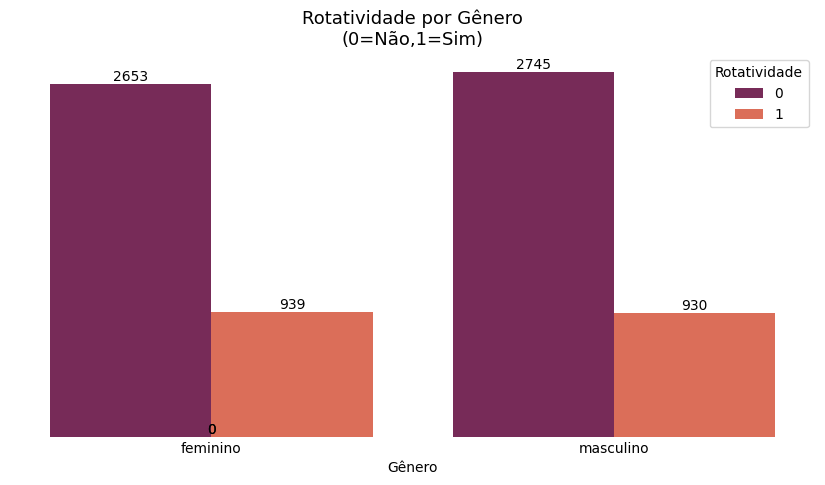

In [44]:
import seaborn as sns


plt.figure(figsize=(9,5))

ax = sns.barplot(data= df_churn_sexo, x='Sexo_Cliente', y='ID_Cliente', hue='Rotatividade', palette='rocket')

plt.title('Rotatividade por Gênero\n(0=Não,1=Sim)', fontsize=13)
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Rotatividade')
plt.tight_layout()
ax.tick_params(axis='both',which='both',length=0)
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)


for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=10
    )
plt.show()

In [34]:
df_normalizado.head()

,ID_Cliente,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Contas_Mensais,Contas_Totais,Contas_Diarias,ChurnLógico
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,Não
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,Não
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,Sim
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,Sim
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,Sim


In [35]:
df_churn_metodo = df_normalizado.groupby(['ChurnLógico','Metodo_Pagamento','Contrato_Conta'])[['ID_Cliente']].count()
df_churn_metodo = df_churn_metodo.reset_index()
df_churn_metodo = df_churn_metodo.query('ChurnLógico == "Sim" | ChurnLógico == "Não"')
df_churn_metodo

,ChurnLógico,Metodo_Pagamento,Contrato_Conta,ID_Cliente
0,Não,Bank transfer (automatic),Month-to-month,407
1,Não,Bank transfer (automatic),One year,363
2,Não,Bank transfer (automatic),Two year,561
3,Não,Credit card (automatic),Month-to-month,379
4,Não,Credit card (automatic),One year,372
5,Não,Credit card (automatic),Two year,585
6,Não,Electronic check,Month-to-month,921
7,Não,Electronic check,One year,295
8,Não,Electronic check,Two year,158
9,Não,Mailed check,Month-to-month,643


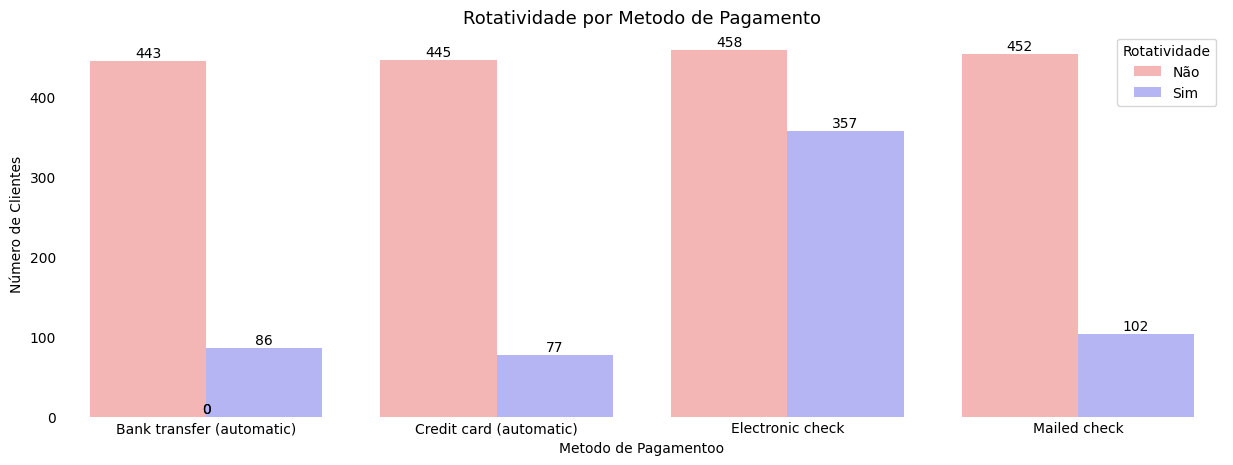

In [36]:
plt.figure(figsize=(15,5))

ax = sns.barplot(data= df_churn_metodo, x='Metodo_Pagamento', y='ID_Cliente', hue='ChurnLógico', palette='bwr_r',errorbar=None)

plt.title('Rotatividade por Metodo de Pagamento', fontsize=13)
plt.xlabel('Metodo de Pagamentoo')
plt.ylabel('Número de Clientes')
plt.legend(title='Rotatividade')

ax.tick_params(axis='both',which='both',length=0)
ax.set_frame_on(False)



for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=10
    )
plt.show()

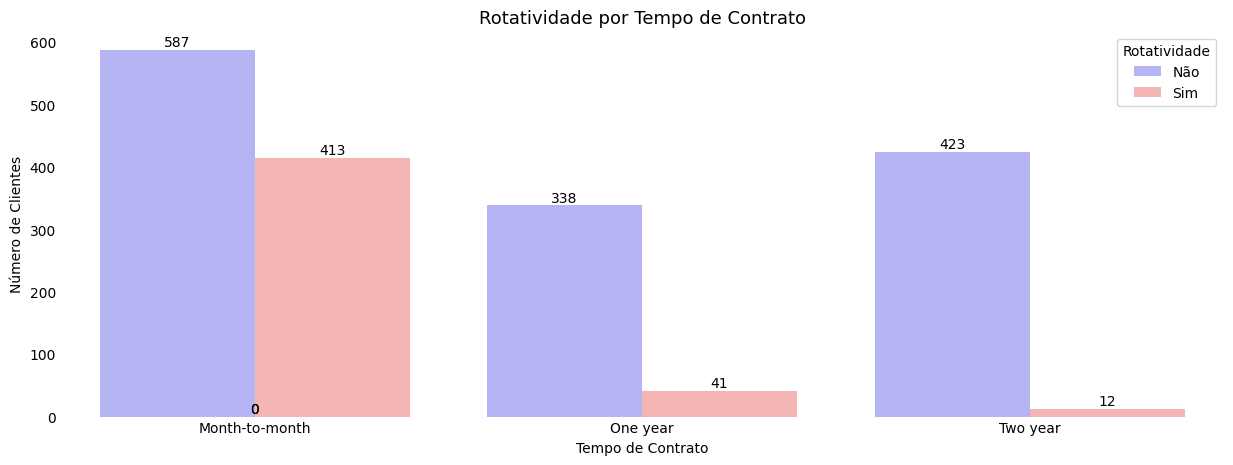

In [37]:
plt.figure(figsize=(15,5))

ax = sns.barplot(data= df_churn_metodo, x='Contrato_Conta', y='ID_Cliente', hue='ChurnLógico', palette='bwr',errorbar=None)

plt.title('Rotatividade por Tempo de Contrato', fontsize=13)
plt.xlabel('Tempo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Rotatividade')

ax.tick_params(axis='both',which='both',length=0)
ax.set_frame_on(False)


for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=10
    )
plt.show()

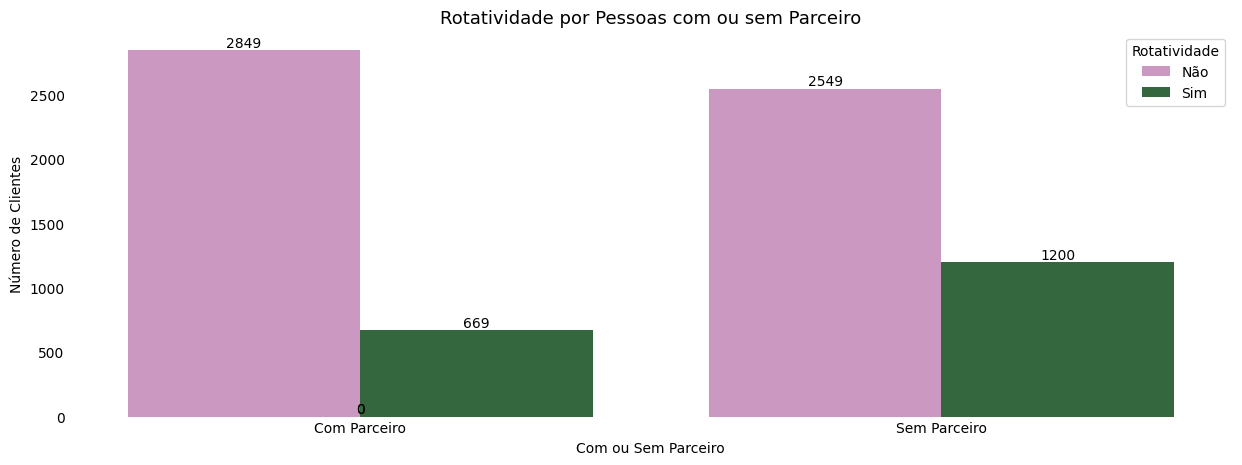

In [38]:
df_normalizado.Cliente_Parceiro = df_normalizado.Cliente_Parceiro.astype(str)
df_normalizado.Cliente_Parceiro = df_normalizado.Cliente_Parceiro.apply(lambda x: x.replace('1', 'Com Parceiro').replace('0', 'Sem Parceiro'))
df_churn_casados = df_normalizado.groupby(['ChurnLógico','Cliente_Parceiro'])[['ID_Cliente']].count()

plt.figure(figsize=(15,5))

ax = sns.barplot(data= df_churn_casados, x='Cliente_Parceiro', y='ID_Cliente', hue='ChurnLógico', palette='cubehelix_r',errorbar=None)

plt.title('Rotatividade por Pessoas com ou sem Parceiro', fontsize=13)
plt.xlabel('Com ou Sem Parceiro')
plt.ylabel('Número de Clientes')
plt.legend(title='Rotatividade')

ax.tick_params(axis='both',which='both',length=0)
ax.set_frame_on(False)


for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=10
    )
plt.show()

#📄Relatorio Final

# Introdução.

Fui contrado pela empresa TelecomX para fazer parte do projeto "Churn de Clientes", no qual realizarei a coleta e o tratamento da sua base de dados de Clientes, também farei um análise inicial, traçando alguns perfis para entender os comportamenos de clientes que levam a rotativida (churn).

# Passos realizos durante o ETL.



*   Realizei a extração da base de dados no formato de Json e transformei em um DataFrama utilizando a bibliteca Pandas.
*   Fiz a verificação dos tipos de variáveis, padronizei para facilitar a manipulação, transformei as variáveis de objeto em numéricas.
*   Realizei o tratamento de dados nulos ou dados NaN que foram identificados, substituindo conforme o necessário.
*   Também criei dados adicionai para auxiliar a analise de tratamento dos dados, como por exemplo "Contas Diárias".




# Análise Exploratória de Dados

Durante nossa primeira análise indetificamos uma taxa de rotatividade relavante e preocupando para a empresa, chegamos ao número de 25,7%, um em cada quatro clientes abandonam o contrato.
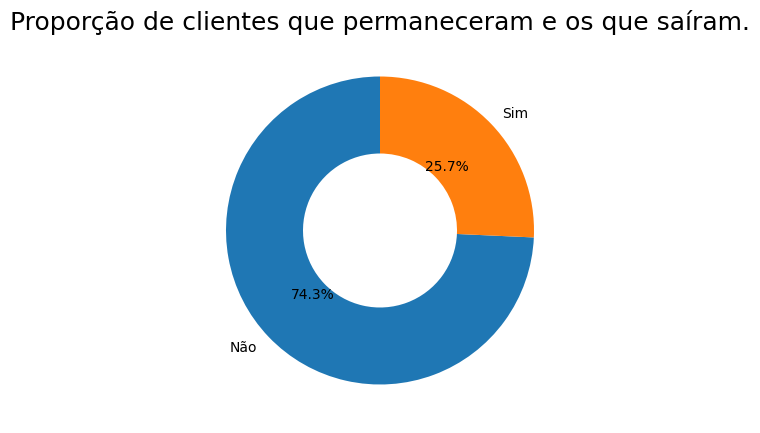

Fizeamos uma análise baseado no gênero das pessoas e chegamos à algumas conclusões, nossas clientes mulheres tendem a cancelar mais os contratos.

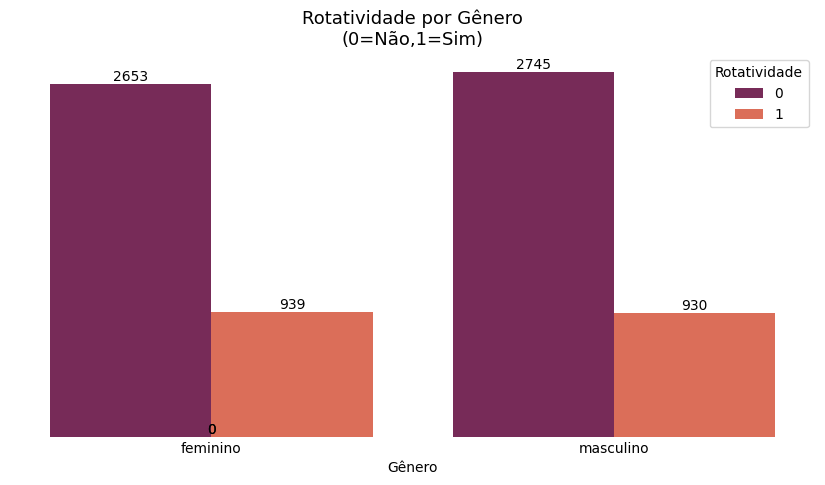

Também podemos observar que clientes com o tipo de contrato mensal e com o formato de pagamento como "Eletronic Check" representam uma fatia muito grande da parcela de rotatividade.

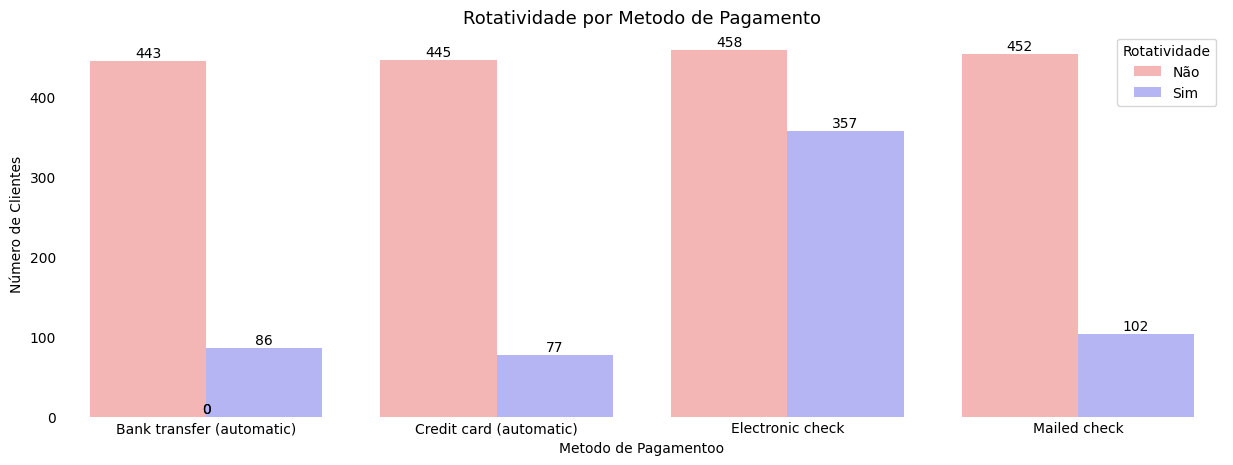

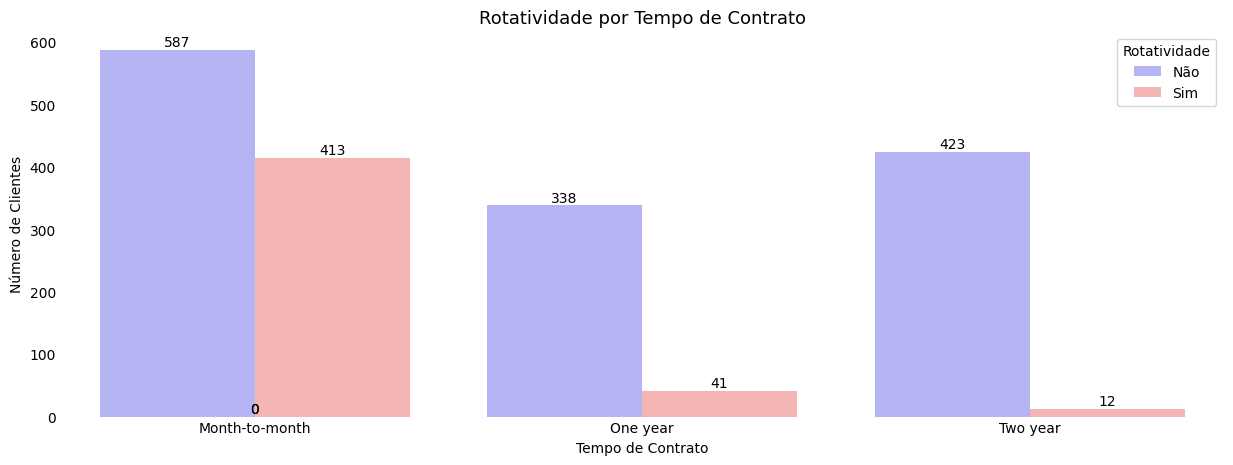

# Conclusões e Insights:
1.   Os clientes que utilizam o método de pagamento "Eletronic Check" apresentam uma rotatividade consideravelmente superior às outras formas.

2.   Clientes de contrato mensal são os mais propensos à cancelar, podemos afirmar que o tempo de contrato tem uma relação mais efetiva em relação ao churn, do que o gasto mensal.

3.  Também observamos que uma variável como a Parteners não tem uma influência considerável em relação ao churn.  



# Recomendações:



*   Podemos criar campanhas com benefícios para aumentar o número de clientes novos com tempo de contrato longos e também oferecer para nosso clientes que possuem contratos de apenas um mês para efetuar a mudança para perídos mais longos.

*   Também precisamos criar estratégias para melhorarmos as formas de pagamentos, pois também indentificamos que a Eletronic Check possui uma taxa de evasão muito elevada.

*   Também precisamos ter um olhar mais critico e entender se a complexidade dos serviços possa contribui para o cancelamento.



